# Chapter 10. How to tell if your toaster is learning - Machine Learning Essentials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## What is machine learning?

## Machine learning isn't perfect

## How does machine learning work?

## Types of machine learning

### Supervised learning    
It's not only about predictions  
Types of supervised learning  
* Regression  
* Classification  
Data is in the eyes of the beholder  

### Unsupervised learning

### Reinforcement learning

### Overview of the types of machine learning

## How does statistical modeling fit into all of this?

## Linear regression

In [2]:
# read the data and set the datetime as the index
# taken from Kaggle: https://www.kaggle.com/c/bike-sharing-demand/data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


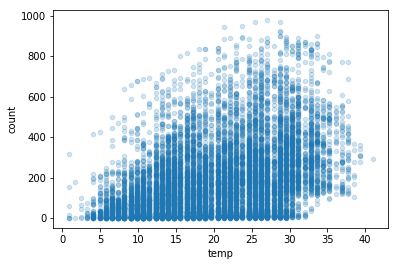

In [4]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)

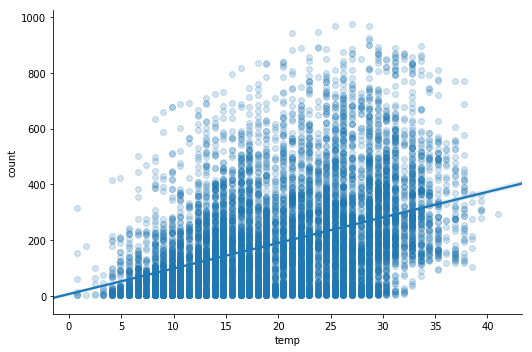

In [5]:
import seaborn as sns #using seaborn to get a line of best fit
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [6]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


In [7]:
# create X and y
feature_cols = ['temp'] # a lsit of the predictors
X = bikes[feature_cols] # subsetting our data to only the predictors
y = bikes['count'] # our response variable

In [8]:
# import scikit-learn, our machine learning module
from sklearn.linear_model import LinearRegression

In [9]:
linreg = LinearRegression() #instantiate a new model
linreg.fit(X, y) #fit the model to our data

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616696
[9.17054048]


In [10]:
new_x = np.array([20]).reshape(-1, 1)
linreg.predict(new_x)
# make a prediction

array([189.45702259])

### Adding more predictors

In [11]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']
# create X and y
X = bikes[feature_cols]
y = bikes['count']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# pair the feature names with the coefficients
print(list(zip(feature_cols, linreg.coef_)))

[('temp', 7.864824992477452), ('season', 22.538757532466736), ('weather', 6.6703020359237515), ('humidity', -3.1188733823964974)]


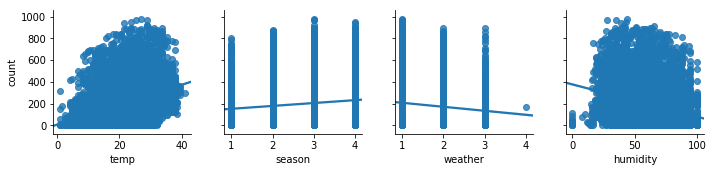

In [12]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
# multiple scatter plots
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

### Regression metrics

In [13]:
# example true and predicted response values
true = [9, 6, 7, 6]
pred = [8, 7, 7, 12]

# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 9.5
RMSE: 3.082207001484488


In [14]:
from sklearn import metrics
# import metrics from scikit learn

feature_cols = ['temp']
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE
# Can be interpreted loosely as an average error

166.44886243326746

In [15]:
feature_cols = ['temp', 'humidity']
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE
# Can be interpreted loosely as an average error

157.7992451452858

In [16]:
feature_cols = ['temp', 'humidity', 'season', 'holiday', 'workingday', 'windspeed', 'atemp']
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE
# Can be interpreted loosely as an average error

155.75989143430357

In [17]:
from sklearn.model_selection import train_test_split
# function that splits data into training and testing sets

feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['count']

X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


164.3621893084704

In [18]:
feature_cols = ['temp', 'workingday']

X = bikes[feature_cols]
y = bikes['count']

X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


169.14019361905213

Null model

In [19]:
average_bike_rental = bikes['count'].mean()
average_bike_rental
# 191.57

191.57413191254824

In [20]:
num_rows = bikes.shape[0]
num_rows
# 10886

10886

In [21]:
null_model_predictions = [average_bike_rental]*num_rows
#null_model_predictions

In [22]:
np.sqrt(metrics.mean_squared_error(y, null_model_predictions))

181.1361335742659

## Logistic regression

### Probability, odds, and log odds

In [23]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0, 0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9, 0.9999, 1]})
table['odds'] = table['probability']/(1 - table['probability'])
table

,probability,odds
0,0.0000,0.000000
1,0.1000,0.111111
2,0.2000,0.250000
3,0.2500,0.333333
4,0.5000,1.000000
5,0.6000,1.500000
6,0.8000,4.000000
7,0.9000,9.000000
8,0.9999,9999.000000
9,1.0000,inf


In [24]:
np.log(10) # == 2.3025
# meaning that e ^ 2.302 == 10

2.302585092994046

In [25]:
# to prove that
2.71828**2.3025850929940459 # == 9.9999
# e ^ log(10) == 10

9.999984511610785

In [26]:
# add log-odds to the table
table['logodds'] = np.log(table['odds'])
table

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,probability,odds,logodds
0,0.0000,0.000000,-inf
1,0.1000,0.111111,-2.197225
2,0.2000,0.250000,-1.386294
3,0.2500,0.333333,-1.098612
4,0.5000,1.000000,0.000000
5,0.6000,1.500000,0.405465
6,0.8000,4.000000,1.386294
7,0.9000,9.000000,2.197225
8,0.9999,9999.000000,9.210240
9,1.0000,inf,inf


In [27]:
prob = .25

odds = prob / (1 - prob)
print(odds)
# 0.33333333

logodds = np.log(odds)
print(logodds)
# -1.09861228


0.3333333333333333
-1.0986122886681098


### The math of logistic regression

In [28]:
# Make a cateogirical response
bikes['above_average'] = bikes['count'] >= average_bike_rental

In [29]:
bikes['above_average'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: above_average, dtype: float64

In [30]:
from sklearn.linear_model import LogisticRegression

feature_cols = ['temp']
# using only temperature

X = bikes[feature_cols]
y = bikes['above_average']
# make our overall X and y variables, this time our y is
# out binary response variable, above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)
# make our train test split

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of out of sample performance
# 0.65650257

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6722997795738428

## Dummy variables

In [31]:
bikes['hour'] = bikes['datetime'].apply(lambda x:int(x[11]+x[12]))
# make a column that is just the hour of the day
bikes['hour'].head()


0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [32]:
# this function takes in an integer hour
# and outputs one of our four options
def when_is_it(hour):
    if hour >= 5 and hour < 11:
        return "morning"
    elif hour >= 11 and hour < 16:
        return "afternoon"
    elif hour >= 16 and hour < 18:
        return "rush_hour"
    else:
        return "off_hours"

In [33]:
bikes['when_is_it'] = bikes['hour'].apply(when_is_it)
bikes[['when_is_it', 'above_average']].head()

,when_is_it,above_average
0,off_hours,False
1,off_hours,False
2,off_hours,False
3,off_hours,False
4,off_hours,False


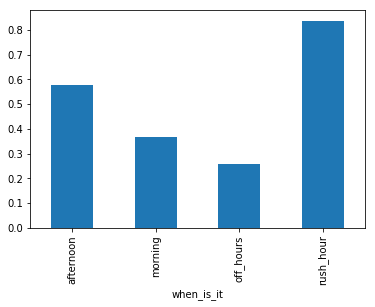

In [34]:
bikes.groupby('when_is_it').above_average.mean().plot(kind='bar')

In [35]:
when_dummies = pd.get_dummies(bikes['when_is_it'], prefix='when__')
when_dummies.head()

,when___afternoon,when___morning,when___off_hours,when___rush_hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [36]:
when_dummies = when_dummies.iloc[:, 1:]
# remove the first column
when_dummies.head()

,when___morning,when___off_hours,when___rush_hour
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [37]:
X = when_dummies
# our new X is our dummy variables
y = bikes.above_average

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of out of sample performance

# 0.685157

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6722997795738428

In [38]:
new_bike = pd.concat([bikes[['temp', 'humidity']], when_dummies], axis=1)
# combine temperature, humidity, and the dummy variables

X = new_bike
# our new X is our dummy variables
y = bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of out of sample performance

# 0.7182218

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7465099191770757